3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [8]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset/bank .csv")

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

In [20]:
object_columns = df.select_dtypes(include=['object']).columns
pd.DataFrame(object_columns, columns=["Object Columns"])

,Object Columns
0,job
1,marital
2,education
3,default
4,housing
5,loan
6,contact
7,month
8,poutcome
9,y


(b) unique values of those columns.

In [23]:
for col in object_columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
--------------------
Unique values for column 'education':
['tertiary' 'secondary' 'unknown' 'primary']
--------------------
Unique values for column 'default':
['no' 'yes']
--------------------
Unique values for column 'housing':
['yes' 'no']
--------------------
Unique values for column 'loan':
['no' 'yes']
--------------------
Unique values for column 'contact':
['unknown' 'cellular' 'telephone']
--------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------
Unique values for column 'poutcome':
['unknown' 'failure' 'other' 'success']
--------------------
Unique values for column 'y':
['no' 'yes']
--------------------


(c) check for the total number of null values in each column.

In [24]:
null_counts = df.isnull().sum()
null_counts

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [30]:
numeric_df = df.select_dtypes(exclude=['object'])
numeric_df.to_csv("banknumericdata.csv", index=False)
(numeric_df)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [31]:
numeric_df = pd.read_csv('banknumericdata.csv')
summary_stats = numeric_df.describe()
summary_stats

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:

• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/medical_students_dataset.csv")
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [35]:
null_counts = df.isnull().sum()
columns_with_missing_values = null_counts[null_counts > 0]
columns_with_missing_values

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.



In [40]:
null_counts = df.isnull().sum()
columns_with_missing_values = null_counts[null_counts > 0]
for column in columns_with_missing_values.index:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
        (f"Filled missing values in '{column}' using mode imputation.")
    elif df[column].dtype in ['int64', 'float64']:
        df[column] = df[column].fillna(df[column].median())
        (f"Filled missing values in '{column}' using median imputation.")
    else:
       (f"Skipping imputation for '{column}' due to unsupported data type.")
    (df.isnull().sum())
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49974.042078,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.000000,29.000000,Female,163.917675,45.225194,B,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.000000,34.000000,Female,174.947103,99.648914,B,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,99999.000000,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [38]:
duplicate_rows = df.duplicated()
(f"Number of duplicate rows: {duplicate_rows.sum()}")
df_no_duplicates = df.drop_duplicates()
(f"DataFrame shape after removing duplicates: {df_no_duplicates.shape}")
df_no_duplicates

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49974.042078,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.000000,29.000000,Female,163.917675,45.225194,B,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.000000,34.000000,Female,174.947103,99.648914,B,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,99999.000000,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [47]:
titanic_df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
subset_df = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]
fare_stats = first_class_df['Fare'].describe()
print("Mean Fare:", fare_stats['mean'])
print("Median Fare:", fare_stats['50%'])
print("Maximum Fare:", fare_stats['max'])
print("Minimum Fare:", fare_stats['min'])

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [61]:
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")
first_class_df_no_nulls = first_class_df.dropna(subset=['Age'])
print(f"Shape of DataFrame after dropping null 'Age' values: {first_class_df_no_nulls.shape}")

Number of null values in 'Age' column: 30
Shape of DataFrame after dropping null 'Age' values: (186, 6)


Problem - 3
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [69]:
titanic_df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")
("Before one-hot encoding:")
(titanic_df[['Embarked']].head())
titanic_df[['Embarked C', 'Embarked Q', 'Embarked S']] = pd.get_dummies(titanic_df['Embarked'])
("\nAfter one-hot encoding:")
(titanic_df[['Embarked C', 'Embarked Q', 'Embarked S']].head())

,Embarked C,Embarked Q,Embarked S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


2. Add these new columns to the original DataFrame.

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


3. Drop the original ’Embarked’ column.

In [73]:
titanic_df = titanic_df.drop('Embarked', axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


4. Print the first few rows of the modified DataFrame to verify the changes.

In [74]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked C,Embarked Q,Embarked S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

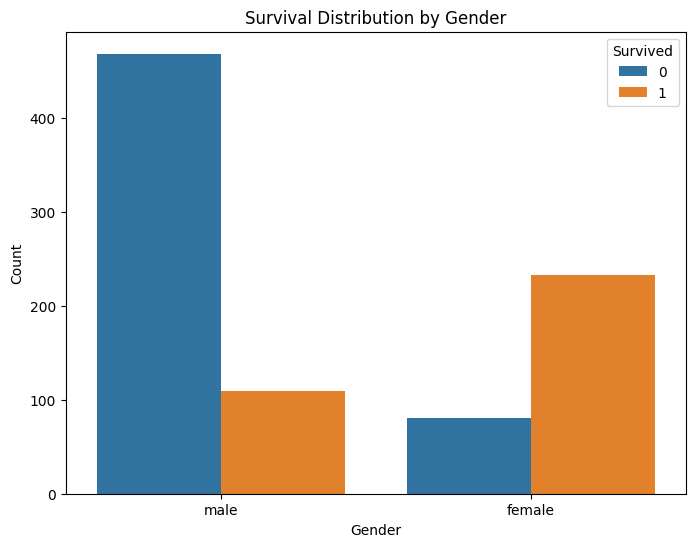

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

(titanic_df[['Sex', 'Survived']].head())
mean_survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
("Mean Survival Rates by Gender:")
(mean_survival_by_sex)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

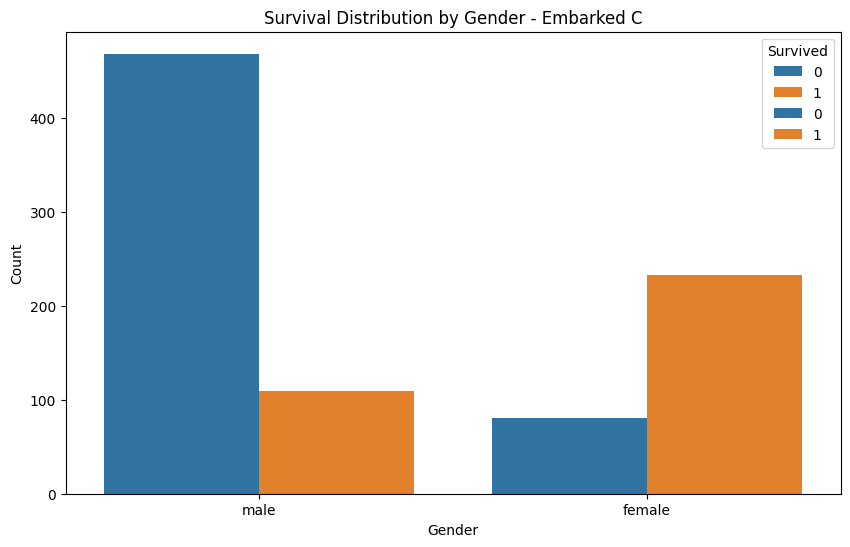

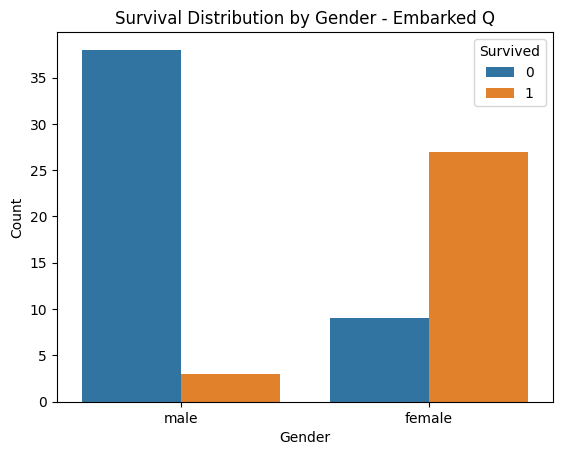

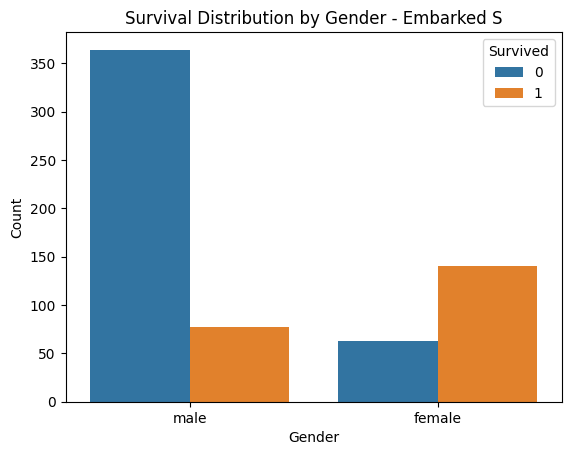

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df, hue_order=[0,1])
for port in ['C', 'Q', 'S']:
    embarked_subset = titanic_df[titanic_df[f"Embarked {port}"] == 1]
    sns.countplot(x='Sex', hue='Survived', data=embarked_subset, hue_order=[0,1])
    plt.title(f'Survival Distribution by Gender - Embarked {port}')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

Problem - 6{Optional}:

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

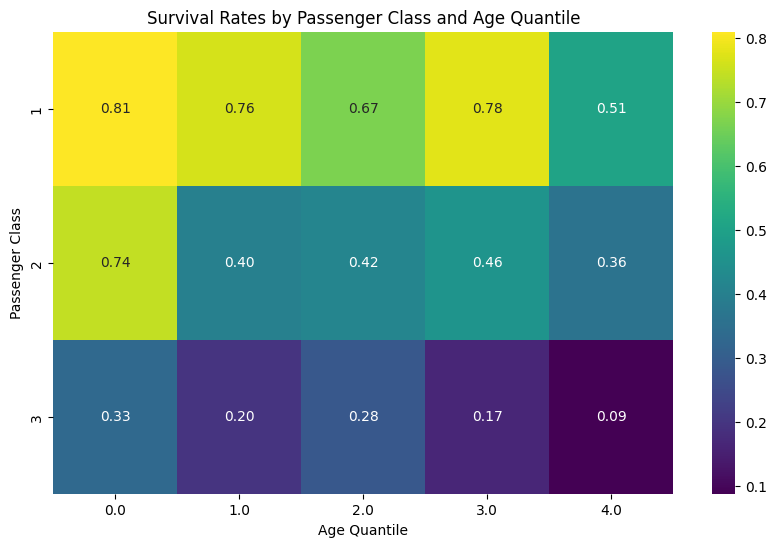

In [82]:
titanic_df['Age_Quantile'] = pd.qcut(titanic_df['Age'], 5, labels=False)
survival_rates = titanic_df.groupby(['Pclass', 'Age_Quantile'])['Survived'].mean().unstack()
(survival_rates)
plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, cmap='viridis', fmt=".2f")
plt.title('Survival Rates by Passenger Class and Age Quantile')
plt.xlabel('Age Quantile')
plt.ylabel('Passenger Class')
plt.show()